In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
import pandas as pd
import requests
import glob

### Data Loading

In [2]:
df = pd.read_csv("paratransit_performance.csv")

In [3]:
df.shape

(1236961, 8)

In [4]:
df.dtypes

,0
Date,object
Hour of Promise Time,int64
Provider Type,object
Arrival Time,object
Percentage of Trips by Arrival Time,object
Pickup Location,object
Total Appointment Trips,int64
Trips Within Arrival Time,int64


In [5]:
df.tail(20)

,Date,Hour of Promise Time,Provider Type,Arrival Time,Percentage of Trips by Arrival Time,Pickup Location,Total Appointment Trips,Trips Within Arrival Time
1236941,04/30/2024,2,Broker,Over 45 mins early,100%,Bronx,1,1
1236942,04/30/2024,3,Primary,Over 45 mins early,100%,Manhattan,1,1
1236943,04/30/2024,23,Broker,Over 1 minute late,100%,Brooklyn,1,1
1236944,04/30/2024,4,Broker,Over 1 minute late,100%,Staten Island,1,1
1236945,04/30/2024,23,Broker,Over 1 minute late,100%,Manhattan,1,1
1236946,04/30/2024,0,Primary,Over 1 minute late,100%,Queens,1,1
1236947,04/30/2024,1,Broker,<1 minute late to 30 mins early (On-Time),100%,Queens,1,1
1236948,04/30/2024,21,Broker,<1 minute late to 30 mins early (On-Time),100%,Queens,1,1
1236949,04/30/2024,0,Primary,<1 minute late to 30 mins early (On-Time),100%,Bronx,1,1
1236950,04/30/2024,22,Broker,<1 minute late to 30 mins early (On-Time),100%,Manhattan,1,1


In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df_2020 = df[df['Date'].dt.year == 2020]

In [7]:
df_2020.head()

,Date,Hour of Promise Time,Provider Type,Arrival Time,Percentage of Trips by Arrival Time,Pickup Location,Total Appointment Trips,Trips Within Arrival Time
418506,2020-01-01,0,Primary,Over 1 minute late,0%,Brooklyn,1,0
418507,2020-01-01,0,Primary,<1 minute late to 30 mins early (On-Time),0%,Brooklyn,1,0
418508,2020-01-01,0,Primary,31 to 45 mins early,100%,Brooklyn,1,1
418509,2020-01-01,0,Primary,Over 45 mins early,0%,Brooklyn,1,0
418510,2020-01-01,0,Primary,Over 1 minute late,NaN,Manhattan,0,0


In [8]:
df = df.dropna(subset=['Date'])

In [9]:
df_2019 = df.loc[lambda x: x['Date'].dt.year == 2019].copy()

In [10]:
df_2019.copy()

,Date,Hour of Promise Time,Provider Type,Arrival Time,Percentage of Trips by Arrival Time,Pickup Location,Total Appointment Trips,Trips Within Arrival Time
121866,2019-01-01,0,Primary,Over 1 minute late,NaN,Bronx,0,0
121867,2019-01-01,0,Primary,<1 minute late to 30 mins early (On-Time),NaN,Bronx,0,0
121868,2019-01-01,0,Primary,31 to 45 mins early,NaN,Bronx,0,0
121869,2019-01-01,0,Primary,Over 45 mins early,NaN,Bronx,0,0
121870,2019-01-01,0,Primary,Over 1 minute late,0%,Brooklyn,1,0
...,...,...,...,...,...,...,...,...
585893,2019-11-30,8,Primary,Over 45 mins early,36%,Staten Island,28,10
585894,2019-11-30,10,Primary,Over 1 minute late,0%,Brooklyn,59,0
585895,2019-11-30,10,Primary,<1 minute late to 30 mins early (On-Time),47%,Brooklyn,59,28
585896,2019-11-30,10,Primary,31 to 45 mins early,29%,Brooklyn,59,17


In [11]:
df_2019['is_weekend'] = df['Date'].apply(lambda x: x.weekday() in [5,6])

In [12]:
df_2019['is_weekend'].value_counts(normalize=True)

,proportion
is_weekend,
False,0.716519
True,0.283481


In [13]:
#is the ride during commuting hours?
df_2019['is_commute'] = df_2019.apply(lambda x: (not x['is_weekend']) and ((7 <= x['Hour of Promise Time'] <= 8) or (17 <= x['Hour of Promise Time'] <= 18)), axis=1)
df_2019['is_commute'].value_counts(normalize=True)

,proportion
is_commute,
False,0.8702
True,0.1298


In [14]:
df_2019['time_of_day'] = df_2019['Hour of Promise Time'].apply( lambda x: 'morning' if 6 <= x < 12 else
                                                     'afternoon' if 12 <= x < 18 else
                                                      'evening' if 18 <= x < 21 else
                                                      'night')
df_2019['time_of_day'].value_counts(normalize=True)

,proportion
time_of_day,
night,0.324061
morning,0.272166
afternoon,0.271930
evening,0.131843


In [15]:
df_2019['is_late'] = df['Arrival Time'].apply(lambda x:
    'on-time' if isinstance(x, str) and x == '<1 minute late to 30 mins early (On-Time)' else
    'early' if isinstance(x, str) and 'early' in x else
    'late' if isinstance(x, str) and 'late' in x else
    'time unknown')
df_2019['is_late'].value_counts(normalize=True)

,proportion
is_late,
early,0.50
late,0.25
on-time,0.25


In [16]:
# this is to just make sure we're doing this correctly
df_2019.sample(10)[['Date', 'Hour of Promise Time', 'is_weekend', 'is_commute', 'time_of_day', 'Arrival Time', 'is_late']]

,Date,Hour of Promise Time,is_weekend,is_commute,time_of_day,Arrival Time,is_late
278123,2019-07-29,3,False,False,night,<1 minute late to 30 mins early (On-Time),on-time
127498,2019-01-07,21,False,False,night,Over 1 minute late,late
285822,2019-08-08,11,False,False,morning,Over 1 minute late,late
400252,2019-12-13,5,False,False,night,31 to 45 mins early,early
411104,2019-12-24,9,False,False,morning,31 to 45 mins early,early
315668,2019-09-10,14,False,False,afternoon,31 to 45 mins early,early
283815,2019-08-06,5,False,False,night,<1 minute late to 30 mins early (On-Time),on-time
375535,2019-11-15,22,False,False,night,<1 minute late to 30 mins early (On-Time),on-time
179601,2019-03-13,11,False,False,morning,Over 45 mins early,early
205490,2019-04-12,14,False,False,afternoon,Over 1 minute late,late


In [17]:
df_2019.shape

(323112, 12)

In [18]:
groupby = (
    df_2019
    .groupby('is_late')
    .pipe(lambda grp:
        pd.DataFrame({
            'total_rides': grp.size(),
            'weekend_rides': grp['is_weekend'].sum(),
            'commute_rides': grp['is_commute'].sum(),
            'morning_rides': grp['time_of_day'].apply(lambda x: (x == 'morning').sum()),
            'afternoon_rides': grp['time_of_day'].apply(lambda x: (x == 'afternoon').sum()),
            'evening_rides': grp['time_of_day'].apply(lambda x: (x == 'evening').sum()),
            'night_rides': grp['time_of_day'].apply(lambda x: (x == 'night').sum()),
            'bronx_rides': grp['Pickup Location'].apply(lambda x: (x == 'Bronx').sum()),
            'brooklyn_rides': grp['Pickup Location'].apply(lambda x: (x == 'Brooklyn').sum()),
            'staten_island_rides': grp['Pickup Location'].apply(lambda x: (x == 'Staten Island').sum()),
            'queens_rides': grp['Pickup Location'].apply(lambda x: (x == 'Queens').sum()),
            'manhattan_rides': grp['Pickup Location'].apply(lambda x: (x == 'Manhattan').sum())

        })
    )
    .assign(pct_weekend=lambda df: df.apply(lambda x: x['weekend_rides'] / x['total_rides'], axis=1))
    .assign(pct_commute=lambda df: df.apply(lambda x: x['commute_rides'] / x['total_rides'], axis=1))
    .assign(pct_brooklyn=lambda df: df.apply(lambda x: x['brooklyn_rides'] / x['total_rides'], axis=1))
    .assign(pct_morning=lambda df: df.apply(lambda x: x['morning_rides'] / x['total_rides'], axis=1)))

In [19]:
print(groupby)

         total_rides  weekend_rides  commute_rides  morning_rides  \
is_late                                                             
early         161556          45798          20970          43970   
late           80778          22899          10485          21985   
on-time        80778          22899          10485          21985   

         afternoon_rides  evening_rides  night_rides  bronx_rides  \
is_late                                                             
early              43932          21300        52354        31422   
late               21966          10650        26177        15711   
on-time            21966          10650        26177        15711   

         brooklyn_rides  staten_island_rides  queens_rides  manhattan_rides  \
is_late                                                                       
early             32904                17116         32530            31948   
late              16452                 8558         16265            1

In [20]:
df_2019['is_weekend_label'] = df_2019['is_weekend'].astype(int)
df_2019['is_commute_label'] = df_2019['is_commute'].astype(int)

print(df_2019[['is_weekend', 'is_weekend_label', 'is_commute', 'is_commute_label']].head())

        is_weekend  is_weekend_label  is_commute  is_commute_label
121866       False                 0       False                 0
121867       False                 0       False                 0
121868       False                 0       False                 0
121869       False                 0       False                 0
121870       False                 0       False                 0


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
df_2019['is_late_number'] = le.fit_transform(df_2019['is_late'])
df_2019['is_late_label'] = df_2019['is_late_number'] / df_2019['is_late_number'].max()
df_2019['time_of_day_number'] = le.fit_transform(df_2019['time_of_day'])
df_2019['time_of_day_label'] = df_2019['time_of_day_number'] / df_2019['time_of_day_number'].max()
df_2019['Pickup_number'] = le.fit_transform(df_2019['Pickup Location'])
df_2019['Pickup_label'] = df_2019['Pickup_number'] / df_2019['Pickup_number'].max()

print(df_2019[['is_late', 'is_late_label', 'time_of_day', 'time_of_day_label', 'Pickup Location','Pickup_label']].sample(20))

        is_late  is_late_label time_of_day  time_of_day_label Pickup Location  \
272734     late            0.5       night           1.000000          Queens   
577908    early            0.0   afternoon           0.000000   Staten Island   
412056    early            0.0     morning           0.666667           Bronx   
205504    early            0.0   afternoon           0.000000          Queens   
577022     late            0.5       night           1.000000        Brooklyn   
315245    early            0.0       night           1.000000        Brooklyn   
144724    early            0.0     evening           0.333333        Brooklyn   
174465    early            0.0     morning           0.666667           Other   
214051  on-time            1.0   afternoon           0.000000       Manhattan   
360410     late            0.5       night           1.000000        Brooklyn   
568639  on-time            1.0   afternoon           0.000000   Staten Island   
252614     late            0

In [23]:
features = [
    'is_late_label',
    'time_of_day_label',
    'Pickup_label',
    'is_weekend_label',
    'is_commute_label',
]

In [24]:
inertias = []

In [25]:
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_2019[features])
    inertias.append(kmeans.inertia_)

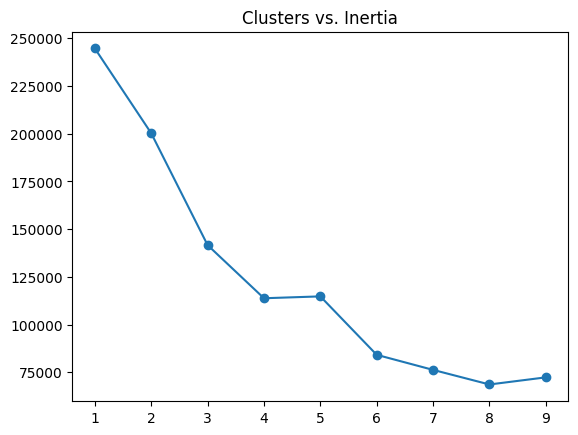

In [26]:
plt.plot(range(1,10), inertias, marker='o')
plt.title('Clusters vs. Inertia')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(df_2019[features])

KMeans(n_clusters=7, random_state=42)

In [28]:
kmeans.labels_

array([6, 2, 6, ..., 3, 0, 0], dtype=int32)

In [29]:
df_2019['kmeans_label'] = kmeans.labels_

In [30]:
df_2019.head()

,Date,Hour of Promise Time,Provider Type,Arrival Time,Percentage of Trips by Arrival Time,Pickup Location,Total Appointment Trips,Trips Within Arrival Time,is_weekend,is_commute,...,is_late,is_weekend_label,is_commute_label,is_late_number,is_late_label,time_of_day_number,time_of_day_label,Pickup_number,Pickup_label,kmeans_label
121866,2019-01-01,0,Primary,Over 1 minute late,NaN,Bronx,0,0,False,False,...,late,0,0,1,0.5,3,1.0,0,0.0,6
121867,2019-01-01,0,Primary,<1 minute late to 30 mins early (On-Time),NaN,Bronx,0,0,False,False,...,on-time,0,0,2,1.0,3,1.0,0,0.0,2
121868,2019-01-01,0,Primary,31 to 45 mins early,NaN,Bronx,0,0,False,False,...,early,0,0,0,0.0,3,1.0,0,0.0,6
121869,2019-01-01,0,Primary,Over 45 mins early,NaN,Bronx,0,0,False,False,...,early,0,0,0,0.0,3,1.0,0,0.0,6
121870,2019-01-01,0,Primary,Over 1 minute late,0%,Brooklyn,1,0,False,False,...,late,0,0,1,0.5,3,1.0,1,0.2,6


In [31]:
df_2019['kmeans_label'].value_counts()

,count
kmeans_label,
6,87786
1,54396
2,47394
5,41940
0,40944
4,27753
3,22899


In [32]:
cluster_feature_averages = df_2019.groupby('kmeans_label')[features].mean().T

In [33]:
cluster_feature_averages

kmeans_label,0,1,2,3,4,5,6
is_late_label,0.166667,0.166667,1.000000,1.000000,0.166667,0.375000,0.166667
time_of_day_label,0.847133,0.092415,0.579110,0.548787,0.108637,0.416849,0.880687
Pickup_label,0.447011,0.443647,0.444626,0.445941,0.444363,0.444120,0.445233
is_weekend_label,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
is_commute_label,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [34]:
cluster_feature_averages['variance'] = cluster_feature_averages.apply(lambda x: x.var(), axis=1)
cluster_feature_averages.sort_values('variance', ascending=False)

kmeans_label,0,1,2,3,4,5,6,variance
is_weekend_label,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.285714
is_late_label,0.166667,0.166667,1.000000,1.000000,0.166667,0.375000,0.166667,0.155010
is_commute_label,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.142857
time_of_day_label,0.847133,0.092415,0.579110,0.548787,0.108637,0.416849,0.880687,0.100028
Pickup_label,0.447011,0.443647,0.444626,0.445941,0.444363,0.444120,0.445233,0.000001
